In [2]:
import os
import string 
import pprint
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize # for tokenising word
from nltk.corpus import stopwords # for importing stop words
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [3]:
df=pd.read_csv(r'text_emotion.csv')#40000 twitter content i.e of 40000 different twitter id's 

In [4]:
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [3]:
text_file = str(list(df['content']))
text1 = open("sample.txt", "w")
n = text1.write(text_file)
text = open("sample.txt").read()

In [4]:
lower_case_text = text.lower()

In [5]:
cleaned_text = lower_case_text.translate(str.maketrans('','',string.punctuation))

In [6]:
tokenized_word = word_tokenize(cleaned_text,"english")

In [7]:
final_words = []
for word in tokenized_word:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [34]:
emotions_list = []
with open('emotions.txt','r') as emotions_file:
    for line in emotions_file:
        cleared_line = line.replace('\n',"").replace(',',"").replace("'","").strip()
        word,emotion = cleared_line.split(':')

        print(f'word : {word}\t\temotion : {emotion}')

        if word in final_words:
            emotions_list.append(emotion)
c = Counter(emotions_list)

word : victimized		emotion :  cheated
word : accused		emotion :  cheated
word : acquitted		emotion :  singled out
word : adorable		emotion :  loved
word : adored		emotion :  loved
word : affected		emotion :  attracted
word : afflicted		emotion :  sad
word : aghast		emotion :  fearful
word : agog		emotion :  attracted
word : agonized		emotion :  sad
word : alarmed		emotion :  fearful
word : amused		emotion :  happy
word : angry		emotion :  angry
word : anguished		emotion :  sad
word : animated		emotion :  happy
word : annoyed		emotion :  angry
word : anxious		emotion :  attracted
word : apathetic		emotion :  bored
word : appalled		emotion :  angry
word : appeased		emotion :  singled out
word : appreciated		emotion :  esteemed
word : apprehensive		emotion :  fearful
word : approved of		emotion :  loved
word : ardent		emotion :  lustful
word : aroused		emotion :  lustful
word : attached		emotion :  attached
word : attracted		emotion :  attracted
word : autonomous		emotion :  independent
w

word : proud		emotion :  happy
word : provoked		emotion :  angry
word : punished		emotion :  hated
word : put upon		emotion :  burdened
word : quaking		emotion :  fearful
word : quiescent		emotion :  apathetic
word : rageful		emotion :  angry
word : rapturous		emotion :  happy
word : rated		emotion :  singled out
word : reassured		emotion :  fearless
word : reckless		emotion :  powerless
word : redeemed		emotion :  singled out
word : regretful		emotion :  sad
word : rejected		emotion :  alone
word : released		emotion :  free
word : remorse		emotion :  sad
word : replaced		emotion :  hated
word : repulsed		emotion :  demoralized
word : resentful		emotion :  angry
word : resolute		emotion :  fearless
word : respected		emotion :  esteemed
word : responsible		emotion :  adequate
word : restful		emotion :  fearful
word : revered		emotion :  esteemed
word : rueful		emotion :  sad
word : sad		emotion :  sad
word : satisfied		emotion :  happy
word : saucy		emotion :  happy
word : scared		emoti

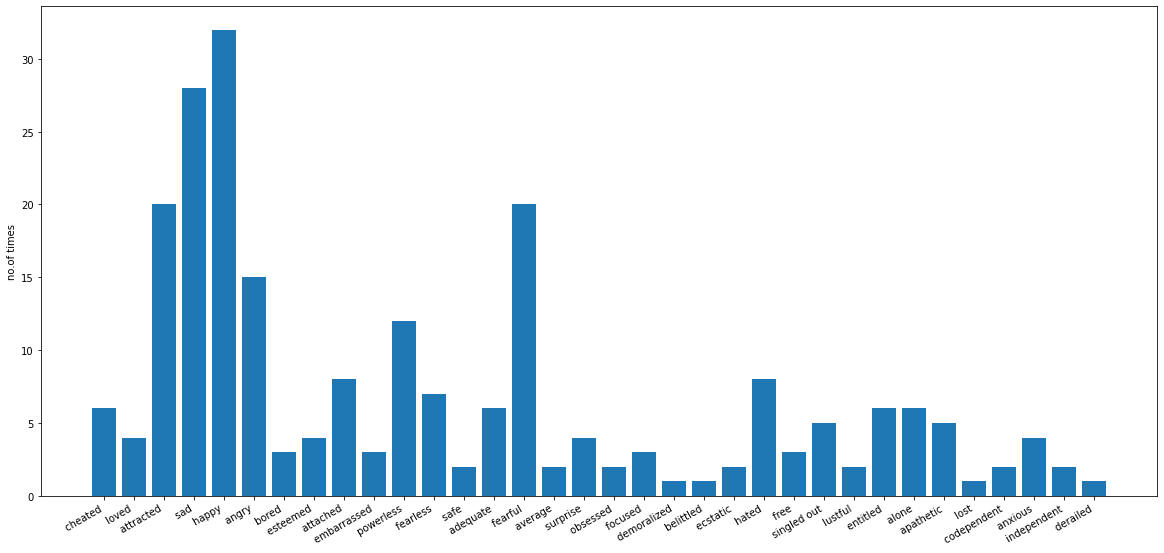

In [50]:
fig , axis = plt.subplots(figsize =(20, 10))
axis.bar(c.keys(),c.values())
fig.autofmt_xdate()
plt.ylabel("no.of times")
plt.savefig('bargraph.png')
plt.show()

In [91]:
#      fig, ax1 = plt.subplots(figsize =(16, 16))
#      ax1.pie(c.values(), labels=c.keys(), autopct='%1.1f%%')
#      ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#      fig.autofmt_xdate()
#      plt.legend()
#      plt.savefig('piegraph.png')
#      plt.show()

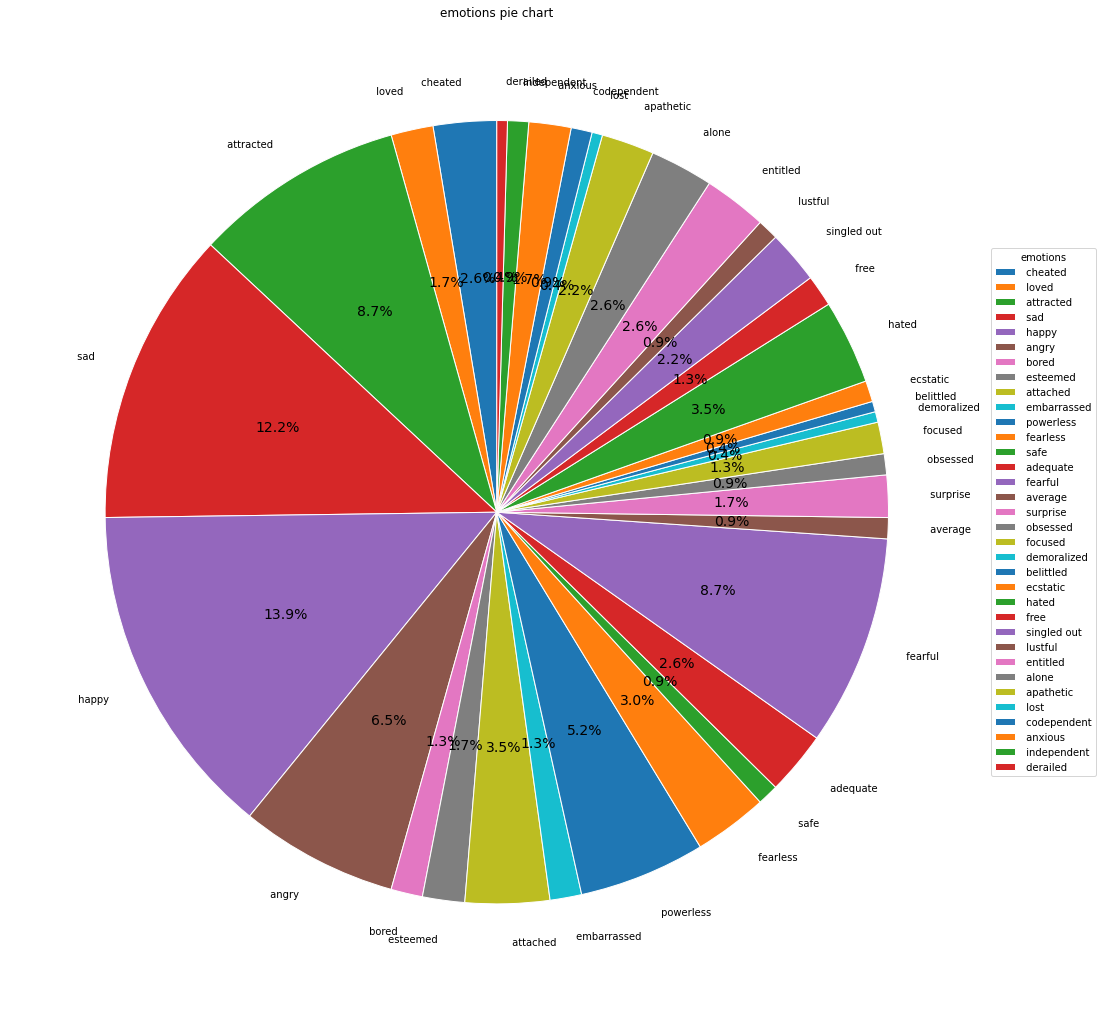

In [88]:
wp = { 'linewidth' : 1, 'edgecolor' : "white" }  

fig, ax = plt.subplots(figsize = (20,20)) 
wedges, texts, autotexts = ax.pie(c.values(),  
                                  autopct = '%1.1f%%',   
                                  labels = c.keys(),   
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black"))
# Adding legend 
ax.legend(wedges, c.keys(), 
          title ="emotions", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 14) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig.autofmt_xdate()
plt.savefig('piegraph.png')
ax.set_title("emotions pie chart") 
  
# show plot 
plt.show()

In [38]:
def sentiment_analysed(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    print(score)
    neg = score['neg']
    pos = score['pos']
    if neg > pos:
        print ("NEGATIVE SENTIMENT")
    elif(pos > neg):
        print ("POSITIVE SENTIMENT")
    else:
        print ("NEUTRAL VIBE")

    fig, ax1 = plt.subplots()
    ax1.pie(score.values(), labels=score.keys(), autopct='%1.1f%%')
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    fig.autofmt_xdate()
    plt.savefig('piegraph2.png')
    plt.show()

{'neg': 0.135, 'neu': 0.667, 'pos': 0.198, 'compound': 1.0}
POSITIVE SENTIMENT


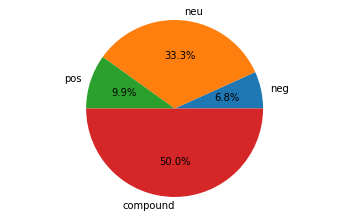

In [39]:
sentiment_analysed(cleaned_text)

In [12]:
text1.close()